## Notação matemática utilizada

Utilizaremos uma notação matemática similar a da prática de regressão logística, com algumas modificações. Elementos modificados estão em azul, novos estão em verdes e, não modificados, em preto.

- $m$: quantidade de instancias
- $f$: quantidade de atributos
- $n^{[l]}$: quantidade de unidades da camada $l$ 
- $X$: Matriz de instâncias representadas pelo seus atributos a ordem da matriz é $m \times f$
- $\pmb{y}$: Vetor de tamanho $m$ representando a classe real de cada instância
- $\pmb{\hat{y}}$: Vetor de predições que, para cada instancia, possui o valor predito para ela. Caso seja uma classificação binária, este valor será 0 ou 1

- $Z^{[l]}$: Matriz, para cada instancia, o valor $z^{[l]}_{i,j}$ representando o resultado da função `z` para instancia $i$ e unidade $j$. Essa matriz é de ordem $m \times n^{[l]}$

- $A^{[l]}$ Matriz de ativações da camada $l$ em que, $a^{[l]}_{i,j}$ é um elemento dessa matriz que representa a ativação da instancia $i$ na camada $l$ na unidade $j$. Dessa forma essa é uma matriz de ordem $m \times n^{[l]}$.

- $W^{[l]}$ Matriz de pesos da camada $l$ em que cada elemento $w^{[l]}_{i,j}$ representa ponderação que a unidade $i$ da camada $l$ faz na unidade $j$ da matriz de ativação $A^{[l-1]}$. Caso seja primeira camada, a ponderação feita no atributo $j$ da matriz $X$. Dessa forma, essa matriz é de ordem $n^{[l]} \times n^{[l-1]}$ exceto na primeira camada que é de ordem $n^{[l]} \times f$

- $Z^{d[l]}$: Derivada $\frac{\partial J}{\partial z^{[l]}_{i,j}}$. Possui a mesma ordem que $Z$

- $W^{d[l]}$: Derivada $\frac{\partial J}{\partial w^{[l]}_{i,j}}$. Possui a mesma ordem que $W$

Como em nossa implementação temos também representado os elementos por unidade, também usaremos a representação por unidade $j$ em uma determinada camada $l$, apresetnada a seguir. Note que são os mesmos elementos da prática de regressão, porém, nesta prática, temos que definir a qual unidade $j$ e camada $l$ estamos nos referindo.

- $\pmb{z}^{[l]}_j$: $j$-ésima coluna da matriz $Z^{[l]}$ representado o resultado da função z, para cada instancia $m$ da unidade $j$ e camada $l$. Assim, este vetor possui o tamanho $m$.
- $\pmb{a}^{[l]}_j$: $j$-ésima coluna da matriz $A^{[l]}$ representando o vetor de ativações da unidade $j$ de tamanho $m$ calculada por meio do vetor $z^[l]_j$
- $\pmb{w}^{[l]}_{j}$: j-ésima **linha** da matriz $W^{[l]}$ que representa vetor de pesos de uma unidade (neurônio) $j$ para ponderar os pesos da camada anterior ou, caso seja a primeira camada, pondera os atributos. Assim, esse vetor possui o tamanho $f$ (primeira camada) e tamanho  $n^{[l-1]}$ (demais camadas).


- $b^{[l]}_j$: Valor de viés da unidade $j$ e camada $l$ (do inglês, bias term)
<!--- <span class="blue" style="color:blue">$w_j$: $j$-ésimo valor do vetor $\pmb{w}$ que pondera $j$-ésima coluna da matriz $A^{[l]}$. Essa coluna representa a $j$-ésima  unidade da camada anterior ou, quando for a primeira camada, o $j$-ésimo atributo da matriz $X$</span>.-->

Além das representações das derivadas por unidade $j$  em uma determinada camada $l$:

- $\pmb{z}^{d[l]}_j$: Vetor de derivada $\frac{\partial J}{\partial z_j}$ para cada instância $i$ do modelo de uma determinada unidade $j$ e camada $l$ em uma determinada camada $l$. Possui o mesmo tamanho que  $\pmb{z}$
- $\pmb{w}^{d[l]}_j$ Vetor de derivada $\frac{\partial J}{\partial w_j}$ para cada unidade $j$ do modelo, possui o mesmo tamanho de $\pmb{w}^{[l]}_{j}$
- $b^{d[l]}_j$: Derivada $\frac{\partial J}{\partial b^{[l]}_j}$ 

Perceba que esses vetores representam a $j$-ésima coluna de suas respectivas matrizes, para cada unidade $j$. 


## Implementação

A seguir, apresentaremos as modificações que devem ser feitas por classe. Primeiramente, execute as importanções que usaremos na prática:

In [1]:
import numpy as np
import pandas as pd
import sklearn.datasets
import matplotlib.pyplot as plt
from rede_neural_profunda import *
from util import plot_decision_boundary

### Classe FuncaoAtivacao

**Atividade 1 - Funções de ativações novas e alteração na função sigmoid**: Você agora poderá ver 4 objetos da classe `FuncaoAtivacao` instanciados: sigmoid, relu, leaky_relu e tanh. Você deverá modificar alterar as suas funções lambda para retornar o resultado correto, dependendo da função de ativação.

O valor do vetor de derivadas $\pmb{z^{d[l]}_j}$ é diferente caso estejamos na última camada. Por isso, na classe `FuncaoAtivacao` agora temos um atributo (opcional) `dz_ultima_camada` que é a função da derivada quando  calculamos o vetor $\pmb{z^{d[l]}_j}$ na última camada com uma determinada função de ativação. A função de ativação `sigmoid` será a única que usaremos como última camada, assim, altere o objeto `sigmoid`com a função  `dz_ultima_camada` correspondente. 

O atributo `dz_ultima_camada` do objeto sigmoid terá a função que usamos como `dz_funcao`  na prática passada. Agora, o parametro `dz_funcao` será diferente: temos que usar o parâmetro `arr_dz_w_prox` representando a $j$-ésima coluna do produto $Z^{d[l+1]} \times W^{[l+1]}$. Crie também as funções de ativação relu, leaky_relu e tangente hiperbólica (variáveis `relu`, `leaky_relu` e `tanh`, respectivamente) usando apenas os parâmetros do contrutor `funcao` e `dz_funcao`. Lembrando que não usaremos as funções de ativação `relu`, `leaky_relu` e `tanh` como última camada (camada de saída). Para implementar essas expressões lambda, você poderá usar vetorização. Lembre-se do seguinte código da prática de regressão logística: 

In [2]:
import numpy as np
meu_querido_vetor = np.array([3,2,8,9,2])
#a linha abaixo retorna true ou false, dependendo do valor
print(meu_querido_vetor>4)
#Se multiplicamos um número por um vetor numpy de true e false 
#. é o mesmo de multiplicarmos o número por 1 ou 0, respectivamente
print(3*(meu_querido_vetor>4))

[False False  True  True False]
[0 0 3 3 0]


### Alteração da classe `RegressaoLogistica` para `Unidade`

**Classe Unidade:** A classe RegressaoLogistica da prática anterior foi renomeada para Unidade.  Essa classe já está pronta, agora, ela representará uma unidade (neurônio). Alguns atributos  foram removidos (pois agora não criamos o modelo apenas com uma unidade) e um único atributo foi modificado: tinhamos antes o `mat_x`, representando a matriz $X$, ao invés dele, temos que utilizar a matriz $A^{[l-1]}$, ou seja, a matriz de ativações da camada anterior. Essa matriz, representada pelo atributo `mat_a_ant`, é usada no lugar de `mat_x` para calcular o `forward_propagation` e o `backward_propagation`. Reveja a implementação e relembre os atributos dela:

- `b`: Valor $b$ de viés da regressão logística 
- `func_ativacao`: função de ativação a ser usada. Esse atributo é uma função Python
- `dz_func`: função derivada a ser usada de acordo com a função de ativação
- `arr_w`: vetor de pesos $\pmb{w^{[l]}_{j}}$
- `arr_z`: vetor de resultados $\pmb{z^{[l]}_{j}}$ 
- `arr_a`: vetor de ativações $\pmb{a^{[l]}_{j}}$
- `mat_a_ant`: Matriz de ativações da camada anterior $A^{[l-1]}$ (ou matriz $X$, caso esta seja a primeira camada)
- `gradiente`: Instancia da classe `Gradiente` que possui os atributos `arr_dz`, `arr_dw` e `db` representando, respectivamente, $\pmb{z^{d[l]}_j}$, $\pmb{w^{d[l]}_j}$ e $b^{d[l]}_j$.

### Implementação da classe Camada

A classe camada possui os seguintes atributos:

- `arr_unidades`: Vetor de unidades (neurônios) desta camada. Representada por instâncias da classe `Unidade`. São inicializados por meio dos parametros do contrutor que definem a quantidade de unidades, função de ativação e derivada (`qtd_unidades`, `func_ativacao` e `func_dz` respectivamente).
- `ant_camada`: Instância da classe `Camada` referente à camada anterior. Caso seja a primeira camada escondida, então `ant_camada == None`
- `prox_camada`: Instância da classe `Camada` referente à proxima camada. Caso seja a última camada (camada de saída), então `prox_camada == None`
- `qtd_un_camada_ant`: Quantidade de unidades da camada anterior, armazena o valor $n^{[l-1]}$ exceto na primeira camada que recebe o valor $f$ 
- `mat_w`: atributo calculado (`property`) representando a matriz de pesos $W^{[l]}$ desta camada
- `mat_dz`: atributo calculado (`property`) representando a derivada $Z^{d[l]}$. 
- `mat_dz_w`: Atributo calculado que efetua o produto $Z^{d[l]} \times W^{[l]}$

**Atividade 2 - construtor da classe `Camada`**: Inicialize o vetor de `arr_unidades` com a quantidade de unidades correspondente (use os parâmetros do construtor da classe)

**Atividade 3 - método `forward_propagation` da classe `Camada`**: Nesse método, você deverá criar a matriz de ativação $A^{[l]}$ da camada atual $l$ (representada por `mat_a`) por meio da matriz de ativações anterior $A^{[l-1]}$ (representada por `mat_a_ant`). Para isso, você deverá chamar o método `forward_propagation` de cada unidade (classe Unidade), implementado por vocês na prática de Regressão Logística, que cria o vetor $\pmb{a^{[l]}_j}$, representado por `arr_a` de cada unidade. Para criar a matriz `mat_a`, observe sempre a sua dimensão. Dica: veja abaixo uma forma de preencher valores em linhas/colunas de uma matriz numpy por meio de vetores. Você deverá usar [np.zeros](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html) para inicializar a matriz.

In [3]:
#considere a matriz mat_h e o vetor arr_linha e arr_coluna:
mat_h = np.zeros((10,5))
arr_linha = np.random.rand(5)
arr_coluna = np.random.rand(10)
print(mat_h)
print(arr_linha)
print(arr_coluna)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[0.79223112 0.00935504 0.51474765 0.99774684 0.12712376]
[0.69333518 0.52699829 0.20313503 0.14457665 0.4233861  0.06748847
 0.58341238 0.83772798 0.87669935 0.66135524]


In [4]:
#para preenchermos a linha 3 com o vetor arr_linha:
mat_h[3,:] = arr_linha
mat_h

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.79223112, 0.00935504, 0.51474765, 0.99774684, 0.12712376],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

In [5]:
#para preenchermos a coluna 2 com o vetor arr_coluna: 
mat_h[:,2] = arr_coluna
mat_h

array([[0.        , 0.        , 0.69333518, 0.        , 0.        ],
       [0.        , 0.        , 0.52699829, 0.        , 0.        ],
       [0.        , 0.        , 0.20313503, 0.        , 0.        ],
       [0.79223112, 0.00935504, 0.14457665, 0.99774684, 0.12712376],
       [0.        , 0.        , 0.4233861 , 0.        , 0.        ],
       [0.        , 0.        , 0.06748847, 0.        , 0.        ],
       [0.        , 0.        , 0.58341238, 0.        , 0.        ],
       [0.        , 0.        , 0.83772798, 0.        , 0.        ],
       [0.        , 0.        , 0.87669935, 0.        , 0.        ],
       [0.        , 0.        , 0.66135524, 0.        , 0.        ]])

**Atividade 4 - propriedades da classe `Camada`**: Você deverá implementar as propriedades `mat_w` e `mat_dz` para criar as matrizes $W^{[l]}$ e $Z^{d[l]}$. Logo após, vocẽ deverá implementar a propriedade `mat_dz_w` que calcula $Z^{d[l]} \times W^{[l]}$. Fique atento nas dimensões das matrizes para usar o preenchimento de matrizes corretamente.

**Atividade 5 - método backward_propagation da classe `Camada`:** Por meio da matriz `mat_dz_dw` da camada seguinte, ou seja, o resultado de $Z^{d[l+1]} \times W^{[l+1]}$ e do vetor de classes $\pmb{y}$, execute o backward propagation de todas as unidades. Para obter o `mat_dz_dw` da camada seguinte não esqueça que as camadas possuem o atributo `prox_camada`. Caso essa seja a última camada, então `mat_dz_dw == None`. 

## Implementação da classe `RedeNeural`

A classe `RedeNeural` possui os seguintes atributos: 

- `arr_camadas`: Vetor que armazena a lista de instancias da classe `Camada` dessa Rede Neural. Esses objetos são instanciados por meio do método `config_rede`
- `arr_qtd_un_por_camada`: Vetor de inteiros que, o valor na posição `i` do vetor corresponde a quantidade de unidades na i-ésima camada.
- `arr_func_a_por_camada`: Função de ativação por camada. Esse vetor armazena objetos da classe `FuncaoAtivacao` em que, cada posição `i` do vetor, corresponde a função de ativação da i-ésima camada
- `num_iteracoes`: Número de iterações (épocas) que a rede neural irá rodar
- `arr_y`: Representa o vetor $\pmb{y}$. Esses objetos são instanciados por meio do método `config_rede`
- `mat_x`: Representa a matriz de atributos por instancias $X$. Esses objetos são instanciados por meio do método `config_rede`

**Atividade 6 - método `config_rede`**: instancia  armazena em arr_camada todas as camadas por meio da
        quantidade de unidades por camada `arr_qtd_un_por_camada` e funções de ativação `arr_func_a_por_camada`. Para cada camada, você deverá referenciar a camada anterior e a próxima por meio os atributos `ant_camada` e `prox_camada`, respectivamente

**Código Python útil para atividades 7 e 8:** Muitas vezes, precisamos percorrer vetores a partir de uma determinada posição ou de trás para frente. Veja como isso pode ser feito usando a função [range](https://docs.python.org/3/library/functions.html#func-range) e a função [enumerate](https://docs.python.org/3/library/functions.html#enumerate):

In [6]:
arr_v = [4,2,4,5,3,1]
tam_vet = len(arr_v)
#percorrer elementos de tras para frente
print("Tras para frente: ")
for i in range(tam_vet-1,-1,-1):
    print(f"Pos arr_v[{i}]: {arr_v[i]}")
print("---")
print("A partir do 3o: ")
#percorrer elementos a partir do indice 3
for i in range(3,tam_vet):
    print(f"Pos arr_v[{i}]: {arr_v[i]}")
    
#Com o enumerate, também conseguimos percorrer a partir de uma posição
#..Lembre que arr_v[3:] retorna o vetor a partir da terceira posição 
print("mesma efeito, com enumerate:")
for i,valor in enumerate(arr_v[3:],3):
    print(f"Pos arr_v[{i}]: {valor}")


Tras para frente: 
Pos arr_v[5]: 1
Pos arr_v[4]: 3
Pos arr_v[3]: 5
Pos arr_v[2]: 4
Pos arr_v[1]: 2
Pos arr_v[0]: 4
---
A partir do 3o: 
Pos arr_v[3]: 5
Pos arr_v[4]: 3
Pos arr_v[5]: 1
mesma efeito, com enumerate:
Pos arr_v[3]: 5
Pos arr_v[4]: 3
Pos arr_v[5]: 1


**Atividade 7 - método `forward_propagation`**: Execute, para todas as camadas, o método forward_propagation. Note que, para primeira camada,
    a entrada será a matriz $X$, representada por `mat_x` e, as demais, seriam a matriz $A^{[l-1]}$, ou seja, a matriz de ativações da camada anterior. Lembre-se que cada camada possui sua matriz de ativações representada
    pelo atributo `mat_a` e temos o vetor de camadas para podemos acessar as camadas anteriores.

**Atividade 8 - método `backward_propagation`**: Execute, para todas as camadas, o método backward_propagation. Fique atento na ordem de execução

**Atividade 9 - método `fit`**: SImilar ao método `fit` que implementamos na prática de Regressão Logística, realiza self.num_iteracoes iterações (épocas) da rede neural

**Atividade 10 - método `loss_function`**: Para calcular o `loss_function`, você deverá obter o vetor de ativações $\pmb{a}$ (representado por `arr_a` em cada unidade) apropriado. Fique atento em qual camada/unidade você deverá obter o arr_a.

**Atividade 11 - método `predict`**: similar ao da regressão logistica, para uma determinada matriz $X$ representando todos os atributos a serem preditos, calcula a predição $\pmb{\hat{y}}$ para cada instância $\in X$ por meio do método `forward_propagation` de um modelo já criado. Esse código será muito similar ao que fizemos na prática de regressão logistica, porém, deverá ficar atento a qual camada/unidade você deverá obter o vetor de ativações arr_a

## Exemplo - Rede Neural Funcionando*  🤩 

*Assim espera-se ;-)

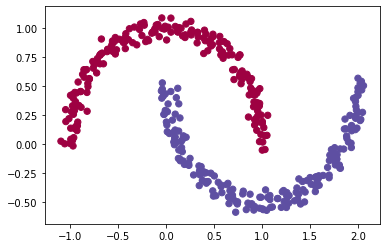

In [7]:
#usaremos o mesmo dataset da prática de regrssão logistica:
mat_x, arr_y = sklearn.datasets.make_moons(400, noise=0.05)
plt.scatter(mat_x[:,0], mat_x[:,1], s=40, c=arr_y, cmap=plt.cm.Spectral)

Crie uma rede neural de duas camadas a primeira com 4 unidades escondidas e, a segunda, com 1 unidade (essa seria a camada de saída). A função de ativação da primeira camada será uma Tangente Hiperbólica (`tanh`) e, da segunda, uma `sigmoid`. Rode por 3.000 épocas. Ao trainar, coloque como learning rate=1.2.

In [8]:
epoches = 3000
learning_rate = 1.2
dnn = RedeNeural([4, 4, 4, 4, 1], [tanh, tanh, tanh, tanh, sigmoid], epoches)
dnn.fit(mat_x, arr_y, learning_rate)

Iteração: 0 Loss: 0.6931471805018962
Iteração: 100 Loss: 0.6931471805017989
Iteração: 200 Loss: 0.6931471805017018
Iteração: 300 Loss: 0.6931471805016045
Iteração: 400 Loss: 0.6931471805015073
Iteração: 500 Loss: 0.69314718050141
Iteração: 600 Loss: 0.6931471805013126
Iteração: 700 Loss: 0.6931471805012153
Iteração: 800 Loss: 0.6931471805011179
Iteração: 900 Loss: 0.6931471805010204
Iteração: 1000 Loss: 0.6931471805009229
Iteração: 1100 Loss: 0.6931471805008251
Iteração: 1200 Loss: 0.6931471805007277
Iteração: 1300 Loss: 0.6931471805006301
Iteração: 1400 Loss: 0.6931471805005325
Iteração: 1500 Loss: 0.6931471805004347
Iteração: 1600 Loss: 0.6931471805003369
Iteração: 1700 Loss: 0.6931471805002392
Iteração: 1800 Loss: 0.6931471805001411
Iteração: 1900 Loss: 0.6931471805000433
Iteração: 2000 Loss: 0.6931471804999453
Iteração: 2100 Loss: 0.6931471804998472
Iteração: 2200 Loss: 0.6931471804997491
Iteração: 2300 Loss: 0.693147180499651
Iteração: 2400 Loss: 0.6931471804995529
Iteração: 2500 

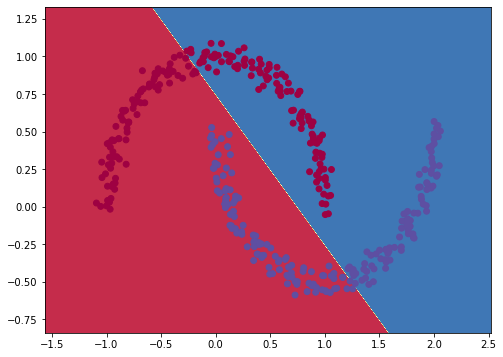

In [9]:
plot_decision_boundary(dnn,mat_x,arr_y)

Faça testes aumentando o número de unidades, a função de ativação e/ou aumentando a profundidade da rede neural. Descreva abaixo o que foi observado. Perceba que, nesta prática, fazer uma rede neural profunda geralmente não irá melhorar o modelo. Um dos motivos é que temos apenas 2 atributos. Uma rede neural profunda tende a melhorar o resultado quando temos diversos atributos, pois, em cada camada reduzimos a dimensionalidade do problema. 

Iteração: 0 Loss: 0.6931471773192601
Iteração: 100 Loss: 0.6931471771543675
Iteração: 200 Loss: 0.6931471769882058
Iteração: 300 Loss: 0.6931471768207111
Iteração: 400 Loss: 0.6931471766518179
Iteração: 500 Loss: 0.6931471764814604
Iteração: 600 Loss: 0.6931471763095718
Iteração: 700 Loss: 0.6931471761360839
Iteração: 800 Loss: 0.6931471759609283
Iteração: 900 Loss: 0.6931471757840347
Iteração: 1000 Loss: 0.6931471756053321
Iteração: 1100 Loss: 0.6931471754247479
Iteração: 1200 Loss: 0.6931471752422091
Iteração: 1300 Loss: 0.6931471750576406
Iteração: 1400 Loss: 0.693147174870966
Iteração: 1500 Loss: 0.6931471746821081
Iteração: 1600 Loss: 0.6931471744909874
Iteração: 1700 Loss: 0.6931471742975238
Iteração: 1800 Loss: 0.6931471741016346
Iteração: 1900 Loss: 0.6931471739032363
Iteração: 2000 Loss: 0.6931471737022433
Iteração: 2100 Loss: 0.693147173498568
Iteração: 2200 Loss: 0.693147173292121
Iteração: 2300 Loss: 0.6931471730828114
Iteração: 2400 Loss: 0.6931471728705455
Iteração: 2500 

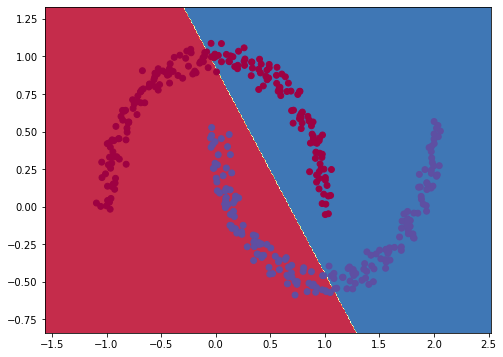

In [10]:
dnn = RedeNeural([12, 12, 12, 12, 1], [tanh, tanh, tanh, tanh, sigmoid], epoches)
dnn.fit(mat_x, arr_y, learning_rate)
plot_decision_boundary(dnn,mat_x,arr_y)

Iteração: 0 Loss: 0.6931471803569671
Iteração: 100 Loss: 0.693147180356656
Iteração: 200 Loss: 0.6931471803563446
Iteração: 300 Loss: 0.6931471803560326
Iteração: 400 Loss: 0.6931471803557205
Iteração: 500 Loss: 0.6931471803554081
Iteração: 600 Loss: 0.6931471803550951
Iteração: 700 Loss: 0.693147180354782
Iteração: 800 Loss: 0.6931471803544683
Iteração: 900 Loss: 0.6931471803541546
Iteração: 1000 Loss: 0.6931471803538406
Iteração: 1100 Loss: 0.6931471803535263
Iteração: 1200 Loss: 0.6931471803532117
Iteração: 1300 Loss: 0.6931471803528966
Iteração: 1400 Loss: 0.6931471803525815
Iteração: 1500 Loss: 0.6931471803522661
Iteração: 1600 Loss: 0.6931471803519503
Iteração: 1700 Loss: 0.6931471803516343
Iteração: 1800 Loss: 0.693147180351318
Iteração: 1900 Loss: 0.6931471803510014
Iteração: 2000 Loss: 0.6931471803506846
Iteração: 2100 Loss: 0.6931471803503675
Iteração: 2200 Loss: 0.69314718035005
Iteração: 2300 Loss: 0.6931471803497322
Iteração: 2400 Loss: 0.6931471803494144
Iteração: 2500 Lo

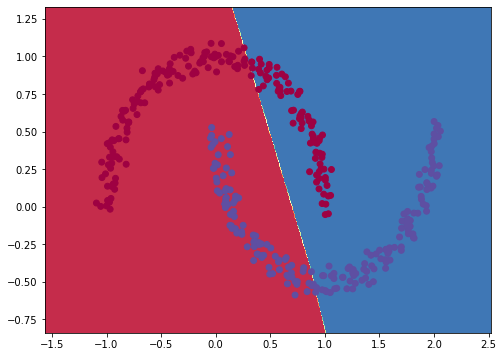

In [11]:
dnn = RedeNeural([4, 4, 4, 4, 1], [relu, relu, relu, relu, sigmoid], epoches)
dnn.fit(mat_x, arr_y, learning_rate)
plot_decision_boundary(dnn,mat_x,arr_y)

Iteração: 0 Loss: 0.6931471805611591
Iteração: 100 Loss: 0.6931471805611591
Iteração: 200 Loss: 0.693147180561159
Iteração: 300 Loss: 0.693147180561159
Iteração: 400 Loss: 0.6931471805611588
Iteração: 500 Loss: 0.6931471805611588
Iteração: 600 Loss: 0.6931471805611588
Iteração: 700 Loss: 0.6931471805611586
Iteração: 800 Loss: 0.6931471805611585
Iteração: 900 Loss: 0.6931471805611585
Iteração: 1000 Loss: 0.6931471805611583
Iteração: 1100 Loss: 0.6931471805611582
Iteração: 1200 Loss: 0.6931471805611582
Iteração: 1300 Loss: 0.6931471805611582
Iteração: 1400 Loss: 0.6931471805611582
Iteração: 1500 Loss: 0.6931471805611582
Iteração: 1600 Loss: 0.693147180561158
Iteração: 1700 Loss: 0.693147180561158
Iteração: 1800 Loss: 0.693147180561158
Iteração: 1900 Loss: 0.693147180561158
Iteração: 2000 Loss: 0.6931471805611578
Iteração: 2100 Loss: 0.6931471805611576
Iteração: 2200 Loss: 0.6931471805611576
Iteração: 2300 Loss: 0.6931471805611576
Iteração: 2400 Loss: 0.6931471805611575
Iteração: 2500 Los

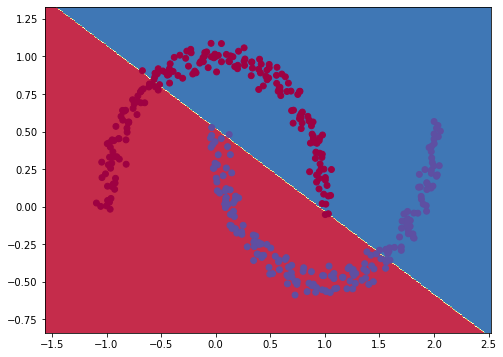

In [12]:
dnn = RedeNeural([4, 4, 4, 4, 4, 1], [tanh, tanh, tanh, tanh, tanh, sigmoid], epoches)
dnn.fit(mat_x, arr_y, learning_rate)
plot_decision_boundary(dnn,mat_x,arr_y)

Ao realizar os testes foi observado que ao aumentar a profundidade da rede obtivemos uma maior inclinação na reta superior do que ao aumento do número de unidades e ao trocar a função de ativação não foi obtido uma linha reta como nos demais testes.